# Skin Cancer Classification

Link of dataset can be found <a href="https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000" >here</a>

Step to integrate dataset to the notebook : 
1. generate kaggle.json from your profile
1. download kaggle api command tools with `pip install kaggle`
1. move kaggle.json to ~/user/.kaggle
1. enter download command with `kaggle datasets download -d kmader/skin-cancer-mnist-ham10000`
1. move the zip file into `dataset` directory
1. extract the zip file
1. install virtual env with command `pip install virtualenv`
1. init virtual env with command `virtual venv -p python3`
1. activate your venv with command `source ./venv/bin/activate`
1. install all libraries with command `pip install -r requirements.txt`
1. if you need another libraries, please don't forget to add those into requirements.txt with command `pip freeze > requirements.txt`

In [2]:
import tensorflow as tf
import os
import numpy as np 
import pandas as pd
from keras.callbacks import ReduceLROnPlateau
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(tf.__version__)

2.4.1


# Exploratory Data 

This section is used to find an insight in dataset. To make better understand about data, using matplotlib and seaborn to visualize data with a chart. 

In [4]:
path_skin_cancer_csv = 'dataset/skin_cancer/HAM10000_metadata.csv'
df_skin_cancer_metadata = pd.read_csv(path_skin_cancer_csv)

In [5]:
df_skin_cancer_metadata.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
7626,HAM_0005190,ISIC_0033311,nv,histo,40.0,female,back
9850,HAM_0000954,ISIC_0026100,akiec,histo,70.0,male,lower extremity
8234,HAM_0001142,ISIC_0024503,nv,histo,50.0,male,foot
1353,HAM_0006522,ISIC_0026369,mel,histo,30.0,female,lower extremity
128,HAM_0006085,ISIC_0032949,bkl,histo,85.0,female,face


In [6]:
df_skin_cancer_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


Text(0.5, 1.0, 'Frequency Distribution of Classes')

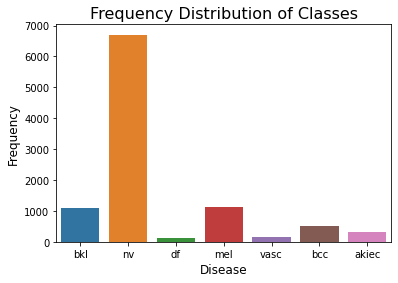

In [7]:
sns.countplot(x='dx', data=df_skin_cancer_metadata)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

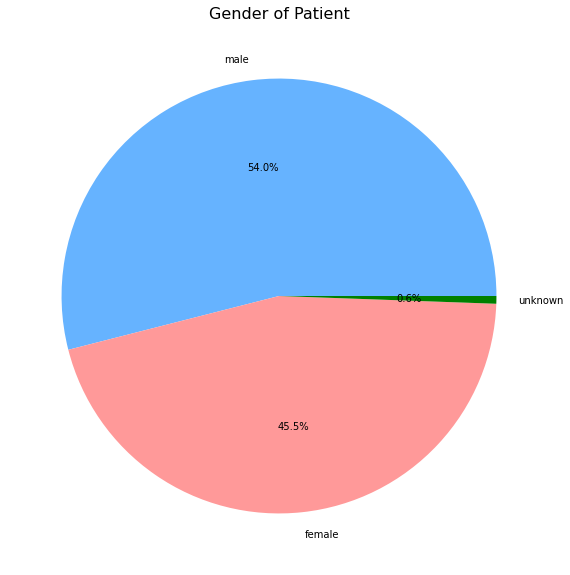

In [8]:
pie_chart_color = ['#66b3ff', '#ff9999', 'green']
bar, ax = plt.subplots(figsize=(10, 10))
plt.pie(df_skin_cancer_metadata['sex'].value_counts(),
        colors=pie_chart_color,
        labels=df_skin_cancer_metadata['sex'].value_counts().index,
        autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

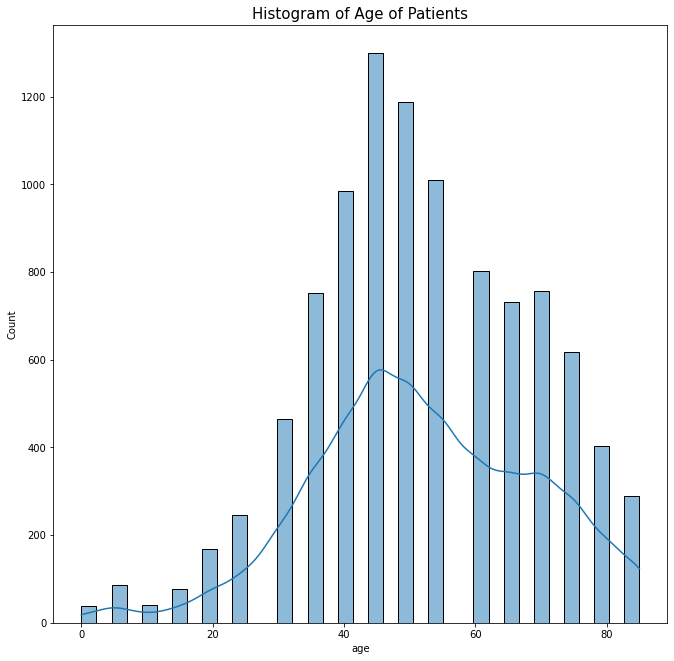

In [9]:
bar, ax = plt.subplots(figsize=(11, 11))
sns.histplot(df_skin_cancer_metadata['age'], kde=True)
plt.title('Histogram of Age of Patients', size=15)

# **Loading the Dataset**

In [10]:
FilePath = "dataset/skin_cancer/hmnist_28_28_RGB.csv"
dataSet = pd.read_csv(FilePath)

In [11]:
dataSet.sample(5)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
3774,216,139,147,220,145,153,220,144,155,221,...,204,130,137,202,129,137,199,127,133,4
2325,142,127,116,162,139,135,170,146,149,175,...,10,7,12,13,9,14,11,8,13,5
1284,248,229,248,247,229,248,248,229,248,249,...,249,224,245,251,226,246,251,224,243,6
2422,214,151,165,216,152,166,217,149,162,216,...,201,138,153,197,133,149,195,131,147,5
5215,228,141,140,229,140,139,229,141,140,230,...,212,136,127,210,134,123,212,136,124,4


In [12]:
_label = dataSet["label"]
_data = dataSet.drop(columns=["label"])

**Count labels**

/home/alshum/Documents/project/ml_api/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

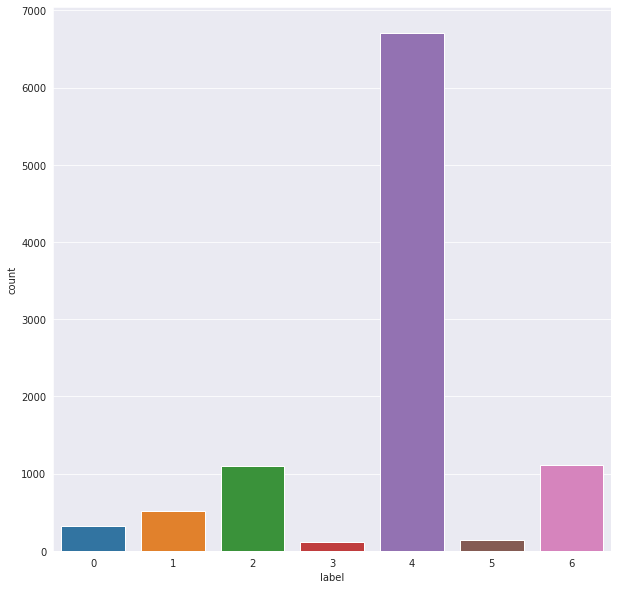

In [13]:
plt.figure(figsize=(10, 10))
sns.set_style("darkgrid")
sns.countplot(_label)

**Balancing Data**

In [14]:
oversample = RandomOverSampler()
_data, _label = oversample.fit_resample(_data, _label)

In [15]:
data = np.array(_data).reshape(-1, 28, 28, 3)
print('Shape of Data :', data.shape)

Shape of Data : (46935, 28, 28, 3)


/home/alshum/Documents/project/ml_api/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

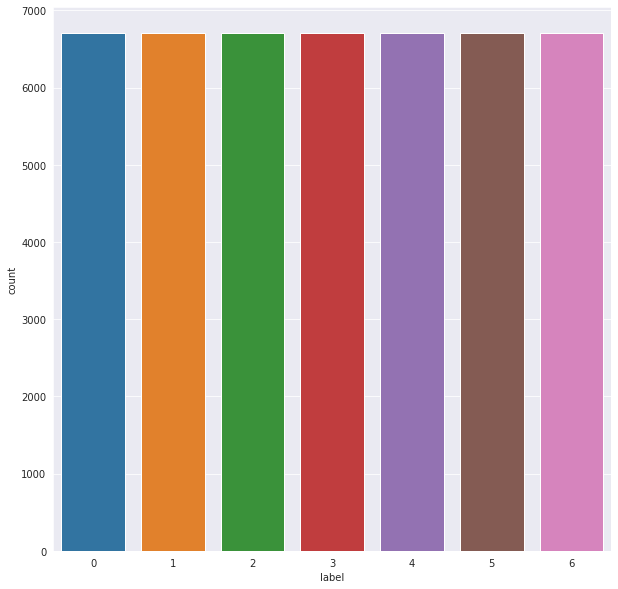

In [16]:
plt.figure(figsize=(10, 10))
sns.set_style("darkgrid")
sns.countplot(_label)

In [17]:
label = np.array(_label)
label

array([2, 2, 2, ..., 6, 6, 6])

In [18]:
classes = {
    4: ('nv', ' melanocytic nevi'),
    6: ('mel', 'melanoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    1: ('bcc', ' basal cell carcinoma'),
    5: ('vasc', ' pyogenic granulomas and hemorrhage'),
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    3: ('df', 'dermatofibroma')
}

**SPLIT DATA INTO TRAIN AND TEST DATA**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=49)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(11734, 28, 28, 3)
(35201,)
(11734,)


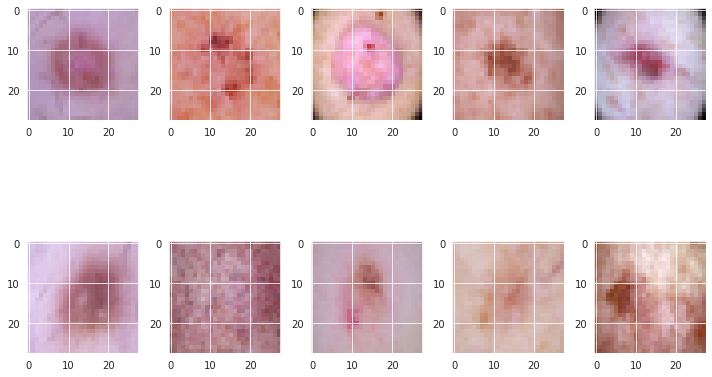

In [15]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

**Convert lables into One-hot encoding**

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


**Data Augmentation to avoid Overfitting**

In [18]:
datagen = ImageDataGenerator(rescale=(1. / 255),
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)

In [19]:
testgen = ImageDataGenerator(rescale=(1. / 255))

**Learing Rate Decay**

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# **Build Our Model**

In [21]:
model = keras.models.Sequential([
    keras.layers.Input(shape = [28,28,3]),
    keras.layers.Conv2D(32 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal'),
    keras.layers.Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal'),
    keras.layers.Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal'),
    keras.layers.Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(units = 256 , activation = 'relu' , kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units = 128 , activation = 'relu' , kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units = 64 , activation = 'relu' , kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units = 32 , activation = 'relu' , kernel_initializer = 'he_normal',
                       kernel_regularizer=keras.regularizers.L1L2()),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units = 7 , activation='softmax',
                       kernel_initializer="glorot_uniform" , name = 'classifier')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         1

In [23]:
model.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])

**Training step**

In [24]:
history = model.fit(X_train,
                    y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    callbacks=[learning_rate_reduction])

Epoch 1/25
276/276 [==============================] - 71s 255ms/step - loss: 2.1406 - accuracy: 0.1828 - val_loss: 2.3014 - val_accuracy: 0.1687
Epoch 2/25
276/276 [==============================] - 70s 253ms/step - loss: 1.6662 - accuracy: 0.3071 - val_loss: 1.7878 - val_accuracy: 0.3417
Epoch 3/25
276/276 [==============================] - 70s 252ms/step - loss: 1.3033 - accuracy: 0.4880 - val_loss: 1.1622 - val_accuracy: 0.5371
Epoch 4/25
276/276 [==============================] - 70s 253ms/step - loss: 1.1136 - accuracy: 0.5677 - val_loss: 1.2361 - val_accuracy: 0.5358
Epoch 5/25
276/276 [==============================] - 76s 276ms/step - loss: 0.8649 - accuracy: 0.6792 - val_loss: 1.3069 - val_accuracy: 0.5340

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/25
276/276 [==============================] - 76s 276ms/step - loss: 0.4913 - accuracy: 0.8273 - val_loss: 0.4895 - val_accuracy: 0.8064
Epoch 7/25
276/276 [=============================

In [26]:
model.evaluate(X_test, y_test)

367/367 [==============================] - 7s 19ms/step - loss: 0.0700 - accuracy: 0.9841


[0.06996113061904907, 0.9841486215591431]

# Analysis after Training

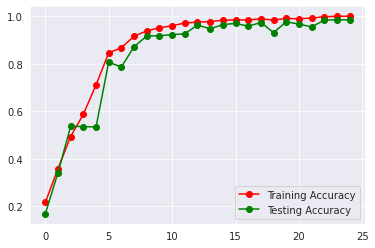

In [27]:
plt.plot(history.history["accuracy"], 'ro-', label="Training Accuracy")
plt.plot(history.history["val_accuracy"], 'go-', label="Testing Accuracy")
plt.legend()
plt.show()

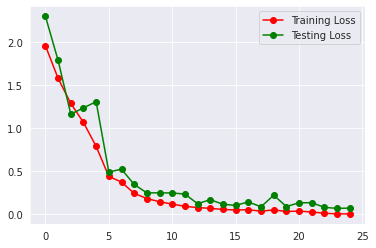

In [28]:
plt.plot(history.history["loss"], 'ro-', label="Training Loss")
plt.plot(history.history["val_loss"], 'go-', label="Testing Loss")
plt.legend()
plt.show()

In [29]:
y_pred = model.predict(X_test).round()

In [30]:
target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test, y_pred, target_names=target_names))

                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       0.99      1.00      1.00      1667
                             ('bcc', ' basal cell carcinoma')       0.99      1.00      1.00      1689
                     ('bkl', 'benign keratosis-like lesions')       0.98      0.99      0.99      1651
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1629
                                  ('nv', ' melanocytic nevi')       0.99      0.89      0.94      1663
              ('vasc', ' pyogenic granulomas and hemorrhage')       1.00      1.00      1.00      1680
                                          ('mel', 'melanoma')       0.94      1.00      0.97      1755

                                                    micro avg       0.98      0.98      0.98     11734
                                                    macro avg       0.9

/home/alshum/Documents/project/ml_api/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

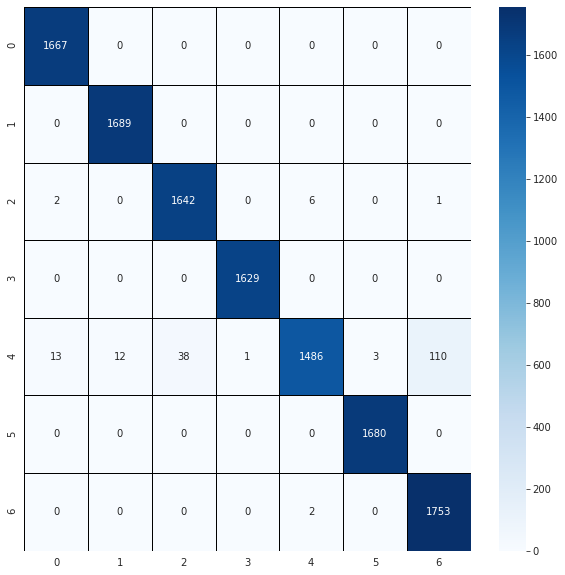

In [31]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm = pd.DataFrame(cm, index=[i for i in range(7)], columns=[i for i in range(7)])
plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='')

**Plot Test Images**

In [32]:
from keras.preprocessing import image

correct = np.nonzero(y_pred == y_test)[0]

k = 0
path = 'dataset/skin_cancer/ham10000_images_part_2/ISIC_0029417.jpg'
img = image.load_img(path, target_size=(28, 28))
wawaw = image.img_to_array(img)
wawaw = np.expand_dims(wawaw, axis=0)
wawaw = np.vstack([wawaw])
result = model.predict(wawaw)
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
print(classes[class_ind])

('bkl', 'benign keratosis-like lesions')


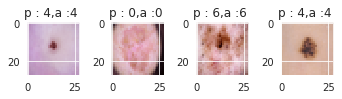

In [33]:
for c in correct[:4]:
    plt.subplot(2, 5, k + 1)
    plt.imshow(X_test[k].reshape(28, 28, 3), interpolation='none')
    plt.title(f"p : {y_pred[k].argmax(axis=0)},a :{y_test[k].argmax(axis=0)} ")
    plt.tight_layout()
    k += 1

# Save model 

In [ ]:
model.save('skin_cancer_latest.h5')